This NB shows the influence of the difference in number of pips between the entry and SL prices on the outcome of the trade

# Dependencies

In [60]:
import pandas as pd
import pdb
import seaborn as sns

# Input data

File with trades needs to be in .csv format

In [65]:
DF=pd.read_csv('counter_b1.calc.csv',sep=',',na_values="n.a.")

Let's check the dimensions of our dataframe. The first value returned by `shape` is the number of records

In [66]:
DF.shape

(67, 16)

# Transforming
We will transform the 2 outcome labels to digits

In [67]:
transl_dict={ 
        'S':1,
        'F':0,
        'success' : 1,
        'failure' : 0,
        True:1, 
        False:0
    }
def digit_binary(x,transl_dict,name):
    '''
    This function will replace the values in categorical
    binary variables by 1 and 0
    
    Parameters
    ----------
    transl_dict: dict
                 Keys will be the old categorical names and Values
                 will be 1 and 0. For example:
                 transl_dict={ 
                            'S':1,
                            'F':0, 
                            True:1, 
                            False:0
                            }
    name: str
          Name of the column to modify
        
    Returns
    -------
    The new label for the categorical variable
    '''

    return transl_dict[x[name]]

DF['outcome']=DF.apply(digit_binary,axis=1,transl_dict=transl_dict, name='outcome')

# Calculate difference entry-SL

In [68]:
DF['diff']=(DF['entry']-DF['SL'])

In [69]:
def calculate_diff(row):
    pips=None
    (first, second) = row['id'].split(" ")[0].split("_")
    diff_price=abs(row['entry']-row['SL'])
    if first == 'JPY' or second == 'JPY':
        pips = diff_price * 100
    else:
        pips = diff_price * 10000

    return float('%.1f' % pips)

DF['diff']=DF.apply(calculate_diff, axis=1)

Let's analyse the distribution of `diff` by outcome:

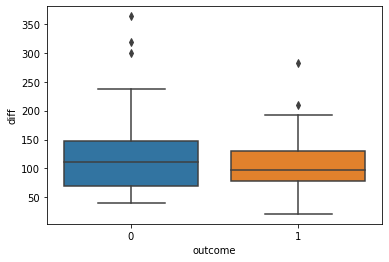

In [70]:
ax = sns.boxplot(x="outcome", y="diff", data=DF)

* Mean for each category

In [71]:
DF.groupby("outcome").agg({'diff': 'mean'})

,diff
outcome,
0,129.779310
1,108.202632


* Median for each category

In [72]:
DF.groupby("outcome").agg({'diff': 'median'})

,diff
outcome,
0,111.9
1,97.9


* Scatter plot coloured by outcome

In [73]:
DF=DF.reset_index()
print(DF.columns)

Index(['index', 'Unnamed: 0', 'id', 'start', 'strat', 'type', 'SMA', 'entry',
       'TP', 'SL', 'SR', 'entry_time', 'outcome', 'pips', 'lasttime',
       'bounces', 'bounces_lasttime', 'diff'],
      dtype='object')


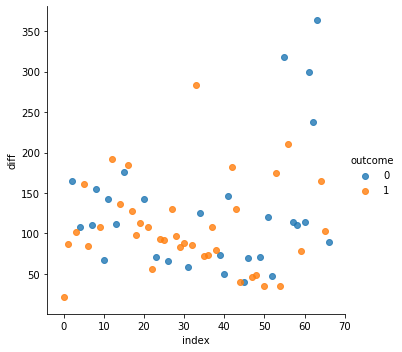

In [74]:
sns.lmplot('index','diff', data=DF, hue='outcome', fit_reg=False)